<a href="https://colab.research.google.com/github/semishen/Chinese-NLP-Practices/blob/main/02_Jeiba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# read file

txt = open('/content/article.txt','r')
lines = list(line.strip('\n') for line in txt if line != '\n')
txt.close()
lines

['賴副總統、現場的各位貴賓、電視機前跟網路上的朋友、全體國人同胞，大家好。',
 '專題／蔡總統關心什麼？就職演說全文與Facebook貼文解析',
 '（一）作為共同體的台灣',
 '今天我站在這裡，以無比感恩的心情，再次承擔台灣人民交付給我的責任。',
 '這是中華民國史上，最特別的總統就職典禮。它特別的地方，不在於典禮的規模，也不在於參與的人數，而在於，我們都知道，這一路走來有多麼不容易。',
 '我要感謝台灣人民，是你們讓這麼不容易的事，在台灣發生。',
 '我要特別謝謝一些人，他們在過去這四個月的防疫期間，很少被人提及。我要謝謝每一位在防疫初期，在藥房門口排隊的台灣人民。謝謝你們的耐心，以及謝謝你們對政府的信任。是你們讓全世界看到，台灣，即使在最不安的時刻，也能保持公民的美德。',
 '我也要謝謝那些居家檢疫、居家隔離的人。你們忍受生活的不便，為的是保護他人的健康。謝謝你們，展現人性中最善良的一面，成就台灣防疫的成功。',
 '國家的光榮感，生死與共的共同體，這一段記憶，將會存在我們每一個人心中。團結的感覺，就是這個樣子。',
 '我們今天現場，有許多各國使節代表，而且我相信，世界上一定有許多國家，也都在關心台灣。',
 '我想藉著這個機會告訴你們，你們看到的國家，有一群善良而堅韌的人民。這一群人民，無論在多麼艱難的環境中，依然能靠著我們的民主、我們的團結，和我們對彼此的責任感，克服挑戰、度過難關，讓台灣在世界上屹立不搖。',
 '（二）空前的挑戰和絕佳的機會',
 '從一月到現在，台灣連續兩次讓國際社會驚豔。第一次是我們的民主選舉，第二次則是我們的防疫成績。',
 '過去這一段時間，因為防疫的成功，「台灣」出現在全世界的各大新聞媒體上。',
 '「台灣」也寫在我們一箱又一箱送往國外的物資上頭。台灣人是世界上最良善的一群人，當我們有能力的時候，一定會向國際社會伸出援手。',
 '我也希望全體國人同胞，除了分享光榮跟喜悅之外，也能體會「自助助人、自助人助」的精神。',
 '疫情還沒有完全結束，我們不能有絲毫鬆懈。就算疫情過去了，衝擊也不會立刻散去。',
 '這次疫情對全球的衝擊既深又廣，它改變了全球政治經濟的秩序，不僅加速、加大了全球供應鏈的重組，重新排列了經濟板塊，也改變了人們的生活和消費型態，甚至也改變了國際社會對台灣和周邊情勢的想像。',
 '這些改

In [ ]:
# jeiba zh_tw

!git clone https://github.com/ldkrsi/jieba-zh_TW.git

Cloning into 'jieba-zh_TW'...
remote: Enumerating objects: 2320, done.
remote: Total 2320 (delta 0), reused 0 (delta 0), pack-reused 2320
Receiving objects: 100% (2320/2320), 44.97 MiB | 21.30 MiB/s, done.
Resolving deltas: 100% (1311/1311), done.


In [ ]:
import jieba

stopwords = '，。、（）／？「」；.● ：的在也是和更讓要會有' # remove some meaningless words and symbols
all_words = []

for line in lines:
  for word in (jieba.lcut(line)):
    if word not in stopwords:
      all_words.append(word)

In [ ]:
# Top 10: 我們, 台灣, 產業, 我, 國家, 發展, 社會, 國際, 未來, 人民
from collections import Counter
word_freq = Counter(all_words)
word_freq.most_common(10)

[('我們', 71),
 ('台灣', 47),
 ('產業', 38),
 ('我', 29),
 ('國家', 27),
 ('發展', 26),
 ('社會', 22),
 ('國際', 21),
 ('未來', 20),
 ('人民', 18)]

In [ ]:
# font: NotoSansCJKtc-hinted
! wget https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip

--2020-07-20 06:12:13--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 64.233.170.128, 2607:f8b0:400c:c0d::80
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|64.233.170.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121247366 (116M) [application/zip]
Saving to: ‘NotoSansCJKtc-hinted.zip’

NotoSansCJKtc-hinte 100%[===================>] 115.63M  87.8MB/s    in 1.3s    

2020-07-20 06:12:15 (87.8 MB/s) - ‘NotoSansCJKtc-hinted.zip’ saved [121247366/121247366]



In [ ]:
!unzip NotoSansCJKtc-hinted.zip

Archive:  NotoSansCJKtc-hinted.zip
  inflating: LICENSE_OFL.txt         
  inflating: NotoSansCJKtc-Black.otf  
  inflating: NotoSansCJKtc-Bold.otf  
  inflating: NotoSansCJKtc-DemiLight.otf  
  inflating: NotoSansCJKtc-Light.otf  
  inflating: NotoSansCJKtc-Medium.otf  
  inflating: NotoSansCJKtc-Regular.otf  
  inflating: NotoSansCJKtc-Thin.otf  
  inflating: NotoSansMonoCJKtc-Bold.otf  
  inflating: NotoSansMonoCJKtc-Regular.otf  
  inflating: README                  


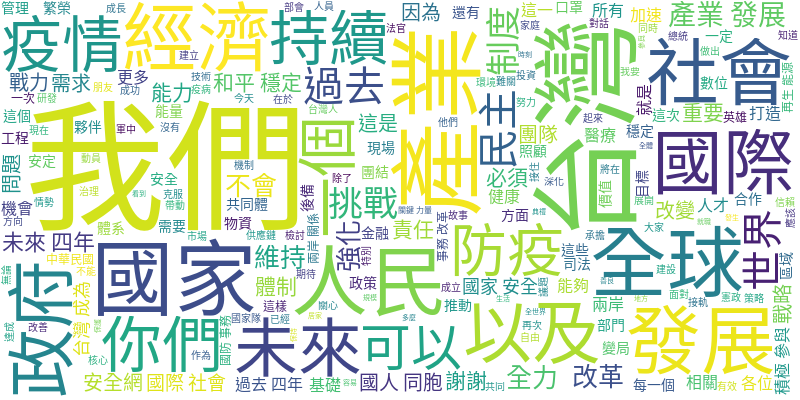

In [ ]:
# words cloud
from wordcloud import WordCloud

wc = WordCloud(width=800, height=400, background_color='white', font_path='/content/NotoSansCJKtc-Regular.otf')
wc.generate(' '.join(all_words))
wc.to_image()